In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
!pip install umap-learn
!pip install hdbscan
!pip install bertopic

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.8/90.8 kB 1.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 21.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for umap-learn: filename=umap_learn-0.5.4-py3-none-any.whl size=86770 sha256=d93905bad382b8a4536387c5c45e3da170835bd56c1bcd0647040b44d7afbe19
  Stored in directory: /root/.cache/pip/wheels/fb/66/29/199acf5784d0f7b8add6d466175ab45506c96e386ed5dd0633
  Created wheel for pynndescent: filename=pynndescent-0.5.10-py3-none-any.whl size=55615 sha256=32e46ec33ca758daa8d41a5884d039c50035a6c5ec1534f97651570436c62804
  Stored in directory: /root/.cache/pip/wheels/4a/38/5d/f60a40a66a9512b7e5e83517ebc2d1b42d857be97d135f1096
Successfully built umap-learn pynndescent
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 41.2 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metad

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')
from string import punctuation
import nltk
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
nltk.download('punkt')
import re
from nltk.stem.porter import *
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
file_name_1 = "gdrive/My Drive/SBERT/complaints.csv"
data = pd.read_csv(file_name_1)
data.drop('Unnamed: 0',axis=1,inplace=True)
data

,Product,Consumer complaint narrative,label,Words Per Tweet
0,"Credit reporting, credit repair services, or o...",My name is XXXX XXXX. I pulled my credit repor...,2,70
1,"Credit reporting, credit repair services, or o...",I am becoming more and more frustrated I have ...,2,84
2,"Credit reporting, credit repair services, or o...","After purchasing a copy of my credit report, I...",2,147
3,"Credit reporting, credit repair services, or o...",I am writing to delete the following informati...,2,80
4,"Credit reporting, credit repair services, or o...",I submitted a dispute on a collection account ...,2,151
...,...,...,...,...
14995,Student loan,I have dealt with Navient ( and XXXX XXXX ) si...,5,265
14996,Student loan,Defaulted on my loans from the original compan...,5,73
14997,Student loan,"On XX/XX/2019, I learned that my last 3 studen...",5,345
14998,Student loan,I initially had my student loans with XXXX XXX...,5,262


In [ ]:
!pip install -U sentence-transformers

In [ ]:
from sentence_transformers import SentenceTransformer
model = SentenceTransformer('all-MiniLM-L6-v2')

In [ ]:
embeddings = model.encode(data['Consumer complaint narrative'].tolist())

KeyboardInterrupt: ignored

In [ ]:
data1 = pd.DataFrame(embeddings,columns=["col{}".format(i) for i in range(1,385)])
data1['Consumer complaint narrative'] = data['Consumer complaint narrative'].tolist()
data1['label'] = data['label'].tolist()
data1['Product'] = data['Product'].tolist()

In [ ]:
data1.to_csv('gdrive/My Drive/SBERT/complaints_dataset_embeddings.csv')

In [ ]:
file_name_1 = "gdrive/My Drive/SBERT/complaints_dataset_embeddings.csv"
data = pd.read_csv(file_name_1)
data.drop('Unnamed: 0',axis=1,inplace=True)
data

,col1,col2,col3,col4,col5,col6,col7,col8,col9,col10,...,col378,col379,col380,col381,col382,col383,col384,Consumer complaint narrative,label,Product
0,-0.007053,0.036896,-0.062162,0.060747,-0.031190,-0.014175,-0.011366,-0.029301,-0.003502,-0.050387,...,-0.052337,-0.004978,-0.029252,0.038641,-0.013225,-0.040087,-0.038630,My name is XXXX XXXX. I pulled my credit repor...,2,"Credit reporting, credit repair services, or o..."
1,-0.085500,0.052140,0.039261,-0.001716,0.040331,-0.026381,0.103406,-0.072089,0.031275,-0.102059,...,-0.034818,-0.050657,0.095110,0.122888,-0.089320,-0.009627,-0.088591,I am becoming more and more frustrated I have ...,2,"Credit reporting, credit repair services, or o..."
2,-0.050837,0.005724,-0.080007,0.058624,-0.007886,0.040834,-0.050472,-0.015521,0.078216,-0.039137,...,0.004522,0.005217,-0.028298,-0.053705,-0.060150,0.019633,-0.010169,"After purchasing a copy of my credit report, I...",2,"Credit reporting, credit repair services, or o..."
3,-0.053147,0.102170,-0.074636,0.022305,0.045990,0.059465,0.075001,-0.039779,0.005551,-0.002273,...,-0.046540,-0.027904,-0.078049,0.071070,0.012554,0.014090,-0.069644,I am writing to delete the following informati...,2,"Credit reporting, credit repair services, or o..."
4,-0.108770,0.026251,-0.059413,0.035813,0.009491,0.000758,0.003904,-0.032836,0.036338,-0.014287,...,-0.051305,-0.086661,-0.041804,0.149977,-0.040714,-0.023308,-0.023216,I submitted a dispute on a collection account ...,2,"Credit reporting, credit repair services, or o..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,-0.048272,0.036304,0.019112,-0.052642,-0.022701,-0.008826,0.012553,0.016953,-0.049602,-0.008039,...,0.059600,0.008215,-0.007710,0.041259,-0.036302,-0.068583,-0.051928,I have dealt with Navient ( and XXXX XXXX ) si...,5,Student loan
14996,-0.046041,-0.014821,0.012117,0.012679,-0.023543,-0.064916,-0.053447,-0.035481,0.034959,-0.076930,...,0.087139,-0.086958,-0.021444,0.061660,-0.061075,-0.067232,-0.014881,Defaulted on my loans from the original compan...,5,Student loan
14997,-0.049317,0.032106,0.039317,-0.035726,-0.000905,-0.073671,-0.007098,-0.015332,0.057714,0.023513,...,0.032381,-0.036337,0.001758,0.009410,-0.047653,-0.031852,-0.069767,"On XX/XX/2019, I learned that my last 3 studen...",5,Student loan
14998,-0.064613,0.064326,0.073982,-0.043781,0.040896,-0.033474,-0.018266,-0.018835,0.015461,-0.019160,...,0.010147,-0.018558,0.003787,0.070301,-0.062143,-0.043200,-0.113735,I initially had my student loans with XXXX XXX...,5,Student loan


In [ ]:
import umap
X,y = data.drop(columns=['Consumer complaint narrative','label','Product'],axis=1),data['label']
umap_embeddings = umap.UMAP(n_neighbors=15,
                            n_components=10,
                            metric='cosine').fit_transform(X)

In [ ]:

import hdbscan
cluster = hdbscan.HDBSCAN(min_cluster_size=200, min_samples=4,
                          metric='euclidean',
                          cluster_selection_method='eom').fit(umap_embeddings)

In [ ]:
unique_labels = np.unique(cluster.labels_,axis=0)
len(unique_labels)

11

In [ ]:

count = pd.Series(cluster.labels_).value_counts()
count

 0    4636
-1    3823
 2    2334
 5    1292
 8     840
 6     499
 3     364
 4     350
 9     346
 1     301
 7     215
dtype: int64

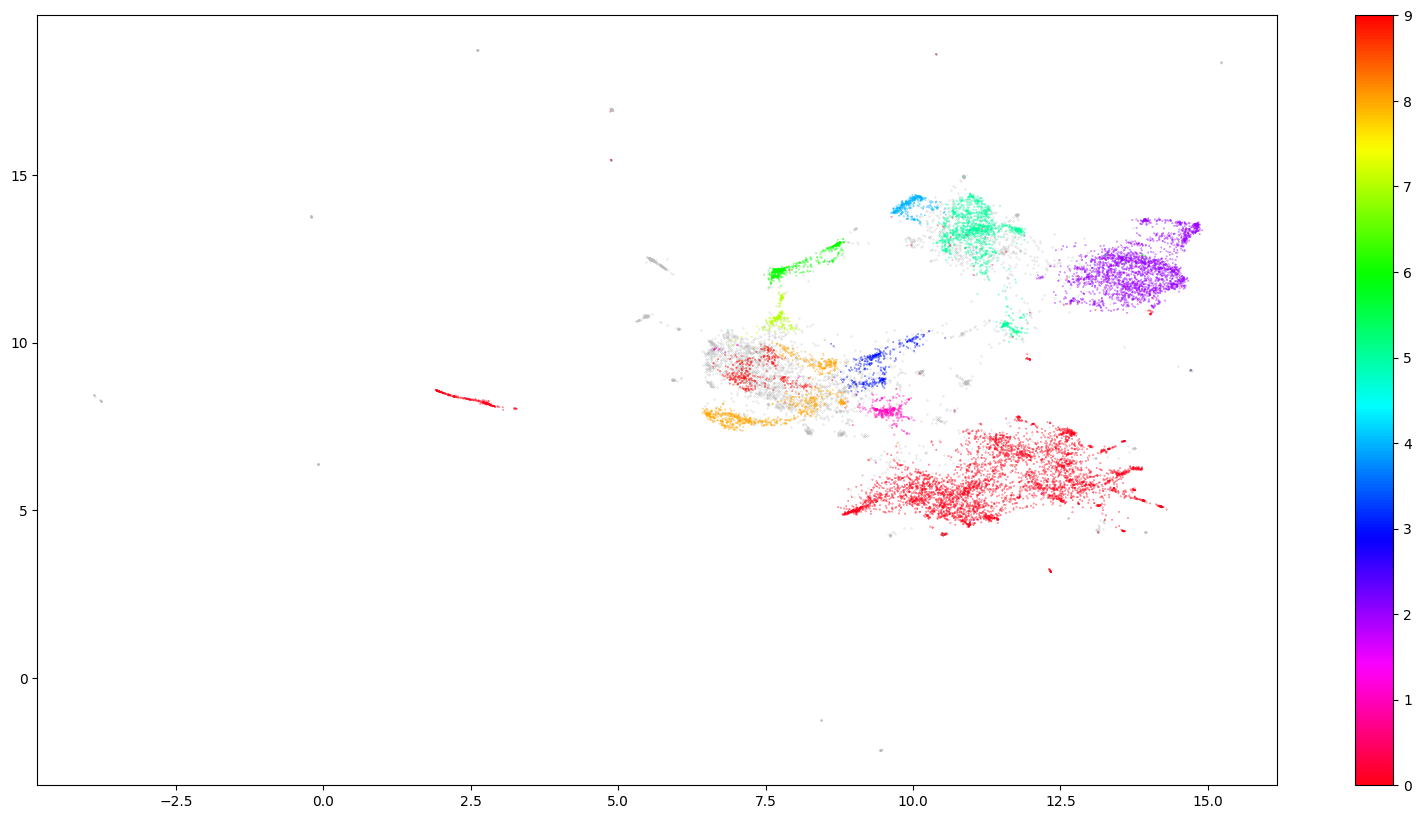

In [ ]:
# Prepare data
umap_data = umap.UMAP(n_neighbors=15, n_components=2, min_dist=0.0, metric='cosine').fit_transform(X)
result = pd.DataFrame(umap_data, columns=['x', 'y'])
result['labels'] = cluster.labels_

# Visualize clusters
fig, ax = plt.subplots(figsize=(20, 10))
outliers = result.loc[result.labels == -1, :]
clustered = result.loc[result.labels != -1, :]
plt.scatter(outliers.x, outliers.y, color='#BDBDBD', s=0.05)
plt.scatter(clustered.x, clustered.y, c=clustered.labels, s=0.05, cmap='hsv_r')
plt.colorbar()

In [ ]:
from bertopic import BERTopic
from sentence_transformers import SentenceTransformer
from sklearn.feature_extraction.text import CountVectorizer
from bertopic.vectorizers import ClassTfidfTransformer
# Prepare data, extract embeddings, and prepare sub-models
docs = data['Consumer complaint narrative'].tolist()
cluster = hdbscan.HDBSCAN(min_cluster_size=200, min_samples=4,
                          metric='euclidean',
                          cluster_selection_method='eom',prediction_data=True)
umap_model = umap.UMAP(n_neighbors=15, n_components=10, min_dist=0.0, metric='cosine', random_state=42)
vectorizer_model = CountVectorizer(ngram_range=(1, 3),stop_words="english")
sentence_model = SentenceTransformer("all-MiniLM-L6-v2")
embeddings = np.array(X)
ctfidf_model = ClassTfidfTransformer(reduce_frequent_words=True)
# We reduce our embeddings to 2D as it will allows us to quickly iterate later on

# Train our topic model
topic_model = BERTopic(hdbscan_model=cluster,embedding_model=sentence_model, umap_model=umap_model,
                       vectorizer_model=vectorizer_model,calculate_probabilities=True,ctfidf_model=ctfidf_model, nr_topics='auto',verbose=True)
topics, probs = topic_model.fit_transform(docs, embeddings)

2023-11-07 10:11:44,281 - BERTopic - Reduced dimensionality
2023-11-07 10:11:47,113 - BERTopic - Clustered reduced embeddings
2023-11-07 10:12:42,372 - BERTopic - Reduced number of topics from 8 to 8


### c-TF-IDF representation of the topics in 2D using Umap and then visualize the two dimensions using plotly such that we can create an interactive view.

In [ ]:
topic_model.visualize_topics()

### Using the previous method, we can visualize the topics and get insight into their relationships. However, you might want a more fine-grained approach where we can visualize the documents inside the topics to see if they were assigned correctly or whether they make sense. To do so, we can use the topic_model.visualize_documents() function. This function recalculates the document embeddings and reduces them to 2-dimensional space for easier visualization purposes

In [ ]:
reduced_embeddings = umap.UMAP(n_neighbors=15, n_components=2,
                          min_dist=0.0, metric='cosine').fit_transform(embeddings)

topic_model.visualize_documents(docs, reduced_embeddings=reduced_embeddings,
                                hide_document_hover=True, hide_annotations=True)

In [ ]:
topic_model.visualize_barchart()

The topics that were created can be hierarchically reduced. In order to understand the potential hierarchical structure of the topics, we can use scipy.cluster.hierarchy to create clusters and visualize how they relate to one another. This might help to select an appropriate nr_topics when reducing the number of topics that you have created.

When tweaking your topic model, the number of topics that are generated has a large effect on the quality of the topic representations. Some topics could be merged and having an understanding of the effect will help you understand which topics should and which should not be merged.

That is where hierarchical topic modeling comes in. It tries to model the possible hierarchical nature of the topics you have created to understand which topics are similar to each other. Moreover, you will have more insight into sub-topics that might exist in your data.

In [ ]:
hierarchical_topics = topic_model.hierarchical_topics(docs)
topic_model.visualize_hierarchy(hierarchical_topics=hierarchical_topics)

100%|██████████| 6/6 [00:01<00:00,  5.94it/s]


In [ ]:
tree = topic_model.get_topic_tree(hierarchical_topics)
print(tree)

.
├─■──late_late payment_payment_days late_xx ── Topic: 6
└─xxxx_xxxx xxxx_xx_xxxx xxxx xxxx_xx xx
     ├─xxxx_xxxx xxxx_xx_xxxx xxxx xxxx_xx xx
     │    ├─■──fargo_wells_wells fargo_xxxx_xx ── Topic: 4
     │    └─xxxx_xxxx xxxx_xx_xxxx xxxx xxxx_xx xx
     │         ├─xxxx xxxx_xxxx xxxx xxxx_xxxx_account_credit
     │         │    ├─■──xxxx xxxx xxxx_xxxx xxxx_xxxx_credit_report ── Topic: 0
     │         │    └─■──card_bank_account_xx_xxxx ── Topic: 1
     │         └─loan_xx_xxxx_loans_payment
     │              ├─■──mortgage_xxxx_loan_xx_xxxx xxxx ── Topic: 3
     │              └─■──loans_loan_student_navient_payments ── Topic: 2
     └─■──capital_card_credit_credit card_account ── Topic: 5



In [ ]:
topic_model.visualize_heatmap()

In [ ]:
classes = np.array(data['Product'])
topics_per_class = topic_model.topics_per_class(docs, classes=classes)
topic_model.visualize_topics_per_class(topics_per_class)

6it [00:29,  4.85s/it]


In [ ]:
# To visualize the probabilities of topic assignment
topic_model.visualize_distribution(probs[1])


In [ ]:
# Calculate the topic distributions on a token-level
topic_distr, topic_token_distr = topic_model.approximate_distribution(docs, calculate_tokens=True)

# Visualize the token-level distributions
df = topic_model.visualize_approximate_distribution(docs[0], topic_token_distr[0])
df

100%|██████████| 15/15 [01:14<00:00,  4.96s/it]


,My,name,is,XXXX,XXXX,pulled,my,credit,report,and,...,consumer,report,and,they,haven,responded,in,over,30,days


# Modelling

In [ ]:
labels = cluster.labels_
print(labels)

[0 0 0 ... 1 1 0]


In [ ]:
unique_labels = np.unique(cluster.labels_,axis=0)

In [ ]:
print("no of clusters:",len(unique_labels))

no of clusters: 8


In [ ]:
# test_x,test_y = data_test.drop(columns=['tweet','sentiment'],axis=1),data_test['sentiment']
# test_x = np.array(test_x)
# test_embeddings = umap.UMAP(n_neighbors=15,
#                             n_components=5,
#                             metric='cosine').fit_transform(test_x)
# test_labels, strengths = hdbscan.approximate_predict(cluster, test_embeddings)
# test_labels

In [ ]:
from collections import defaultdict
clusturing_models = defaultdict(list)
clustering_x = defaultdict(list)
clustering_y = defaultdict(list)
clustering_samples = defaultdict(list)
complaints = data['Consumer complaint narrative'].tolist()

for i in range(len(data)):
  l,u = labels[i],umap_embeddings[i]
  clustering_x[l].append(u)
  clustering_y[l].append(data.label.tolist()[i])
  clustering_samples[l].append(complaints[i])

In [ ]:
cluster_info = []
for i in clustering_x.keys():
  cluster_info.append([i,len(clustering_x[i])])
cluster_info = pd.DataFrame(cluster_info,columns=['cluster_name','sample_size'])
cluster_info

,cluster_name,sample_size
0,0,4894
1,4,213
2,1,2405
3,5,345
4,6,3577
5,-1,1118
6,2,527
7,3,1921


from matplotlib import pyplot as plt
cluster_info['cluster_name'].plot(kind='hist', bins=20, title='cluster_name')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
cluster_info['sample_size'].plot(kind='hist', bins=20, title='sample_size')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
cluster_info.plot(kind='scatter', x='cluster_name', y='sample_size', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
cluster_info['cluster_name'].plot(kind='line', figsize=(8, 4), title='cluster_name')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
cluster_info['sample_size'].plot(kind='line', figsize=(8, 4), title='sample_size')
plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:
data['label'].unique()

array([2, 3, 4, 1, 0, 5])

In [ ]:
data['Product'].unique()

array(['Credit reporting, credit repair services, or other personal consumer reports',
       'Debt collection', 'Mortgage', 'Credit card or prepaid card',
       'Checking or savings account', 'Student loan'], dtype=object)

In [ ]:

#original_model downsample
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score
X,y = data.drop(columns=['Consumer complaint narrative','label','Product'],axis=1),data['label']
# umap_embeddings = umap.UMAP(n_neighbors=100,
#                             n_components=20,
#                             metric='cosine').fit_transform(X)
train_x,test_x,train_y,test_y = train_test_split(umap_embeddings, y, test_size=0.2, random_state=42)
original_clf = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 42).fit(train_x,train_y)
y_train = original_clf.predict(train_x)
target_names = ['Checking or savings account', 'Credit card or prepaid card','Credit reporting, credit repair services, or other personal consumer reports','Debt collection','Mortgage','Student loan']
# print('training report for cluster {}'.format(n_cluster))
# print(classification_report(train_y, y_train, target_names=target_names))
target_names = ['Checking or savings account', 'Credit card or prepaid card','Credit reporting, credit repair services, or other personal consumer reports','Debt collection','Mortgage','Student loan']
y_pred = original_clf.predict(test_x)
print('f1 score',f1_score(test_y, original_clf.predict(test_x),average='weighted'))
print(classification_report(test_y, y_pred, target_names=target_names))

f1 score 0.8264976060969298
                                                                              precision    recall  f1-score   support

                                                 Checking or savings account       0.79      0.89      0.84       506
                                                 Credit card or prepaid card       0.79      0.75      0.77       500
Credit reporting, credit repair services, or other personal consumer reports       0.77      0.81      0.79       502
                                                             Debt collection       0.81      0.74      0.77       535
                                                                    Mortgage       0.91      0.89      0.90       470
                                                                Student loan       0.90      0.90      0.90       487

                                                                    accuracy                           0.83      3000
                          

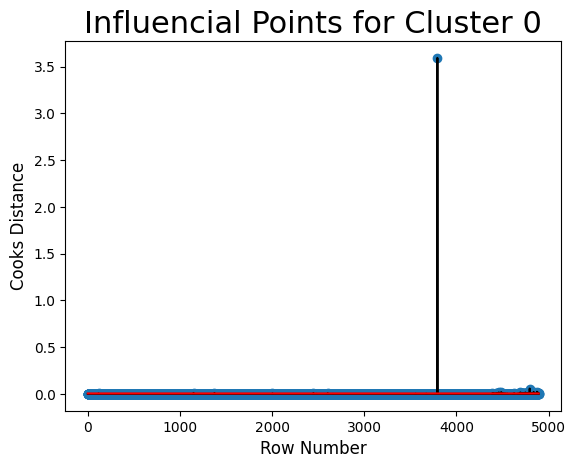

    cook distance                                        discription
0        0.004700  Hello, This complaint is regarding Santander C...
1        0.010196  My sister XXXX XXXX applies for a car loan, an...
2        0.009747  I was a co-signer on the loan. This car was fo...
3        0.005563  On XX/XX/2020, Santander Consumer USA was char...
4        0.009267  I ctc what I thought was Fedloan servicing it ...
..            ...                                                ...
60       0.014780  XXXX of 2021 I send off a 609 letters to all o...
61       0.007365  After almost a dozen written requests you stil...
62       0.009281  In accordance with the fair credit Reporting a...
63       0.009052  In accordance with the fair credit reporting a...
64       0.008762  I sent a Letter to ECMC disputing the accuracy...

[65 rows x 2 columns]


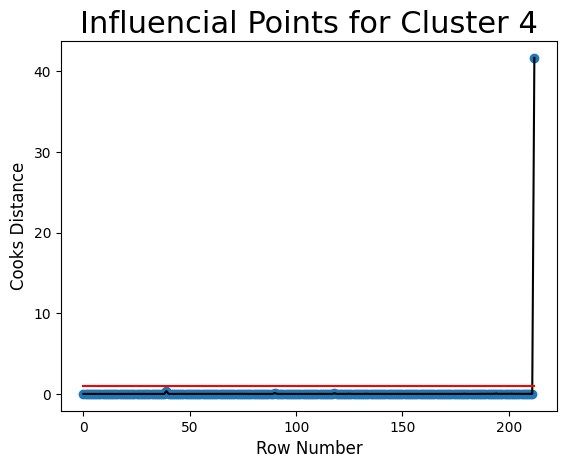

   cook distance                                        discription
0      41.678382  They reported me over 120 days late and that i...


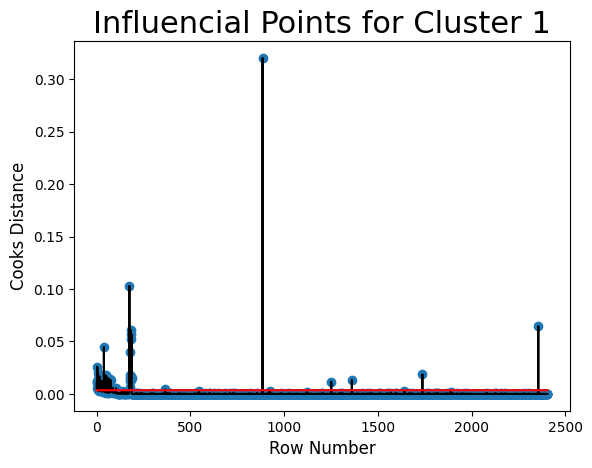

    cook distance                                        discription
0        0.005176  In 2016 I filled litigation with my bankruptcy...
1        0.011627  I am in the middle of a home purchase! I conso...
2        0.011917  In the attempt to fix my credit. I have had it...
3        0.010031  Navient has reported me late multiple times wh...
4        0.026123  I dispute Nelnet Loan Services account for pay...
..            ...                                                ...
88       0.011691  Good day MOHELA, This is in response to your r...
89       0.013292  Without notice, explanation, or legal authorit...
90       0.003095  I have called the company several times and th...
91       0.018712  In XXXX two of my federal student loans, then ...
92       0.064531  It would appear PHEAA has blocked my account a...

[93 rows x 2 columns]


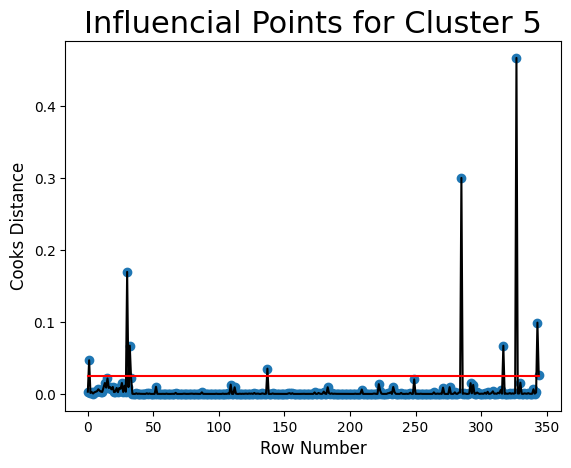

    cook distance                                        discription
0        0.046729  Hello, i had financed a laptop for my wife for...
1        0.021477  XXXX XXXX, XXXX i been trying to sell some my ...
2        0.169516  I have a line of credit with Capital One, whic...
3        0.067002  Hello, I recently submitted an application to ...
4        0.021975  Capital One charged my Credit Card {$450.00} w...
5        0.035130  I am writing without the assistance of any thi...
6        0.300104  Capital One BillPayer failed to deliver two pr...
7        0.066992  On XX/XX/2023 I applied online to open a new c...
8        0.466805  I've requested an address to mail a notice of ...
9        0.099052  My debut was satisfied with the promissory ins...
10       0.026094  I have spoken to Capital Management Services L...


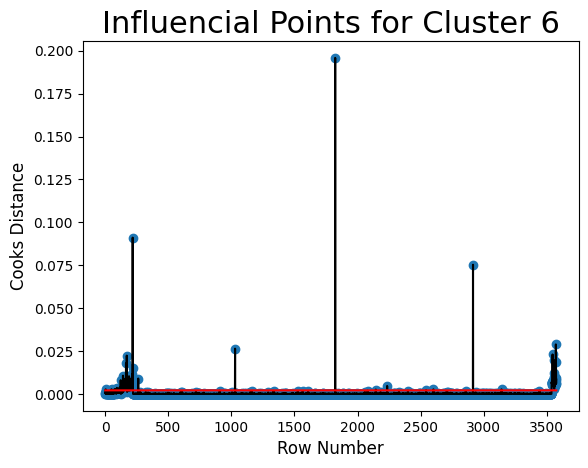

     cook distance                                        discription
0         0.002646  I open an checking account with wells fargo la...
1         0.001720  BofA was informed of mail fraud and reported t...
2         0.002058  Synchrony bank has been repeatedly reporting v...
3         0.002099  I've tried to resolve this situation several t...
4         0.002715  In XX/XX/2021, I voluntarily paid SYNCB charge...
..             ...                                                ...
147       0.006359  Ive tried calling fed loan servicing 4 times t...
148       0.028839  XXXX XXXX XXXX took over XXXX XXXX Loans in XX...
149       0.009464  Sallie Mae " account manager '', XXXX, has con...
150       0.006001  On XXXX I signed up for Auto Debit of my payme...
151       0.008362  I was charged and then got a message saying th...

[152 rows x 2 columns]


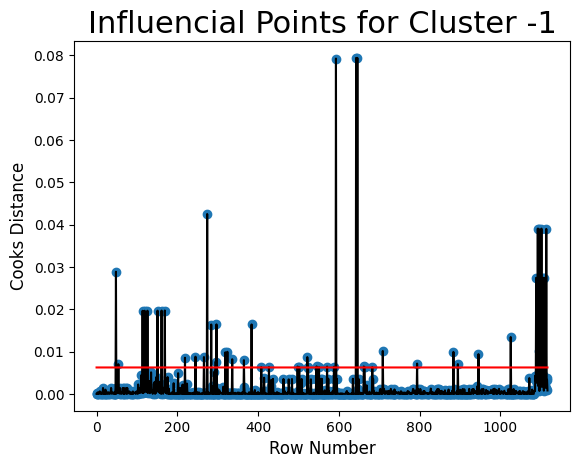

    cook distance                                        discription
0        0.028869  This particular account situation that is late...
1        0.007019  I want this late payment deleted from my accou...
2        0.019641  I have contacted the creditor/company many tim...
3        0.019650  I have contacted the creditor/company many tim...
4        0.019659  I have contacted the creditor/company many tim...
5        0.005101  I have just filed and had accepted my complain...
6        0.019670  I have contacted the creditor/company many tim...
7        0.019686  I have contacted the creditor/company many tim...
8        0.019699  I have contacted the creditor/company many tim...
9        0.008548  I have sent PNC a Payoff for my Second Mortgag...
10       0.008791  PNC Bank Created escrow shortages, with random...
11       0.008710  On XXXX/XXXX/16 I made the last payment on a P...
12       0.042509  I have contacted the creditor/company many tim...
13       0.016400  I see multiple 

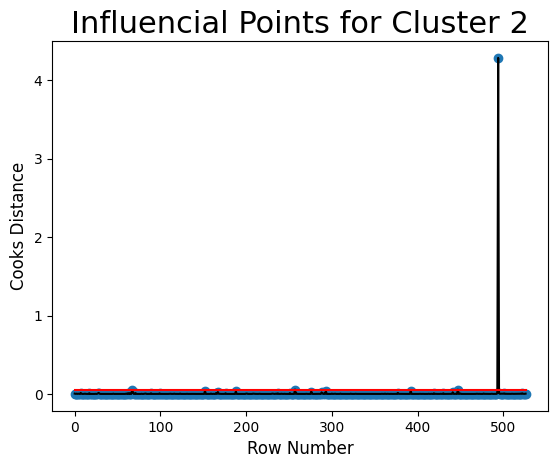

   cook distance                                        discription
0       0.046297  Before I respond to WF, I would like to includ...
1       0.055846  After bankruptcy, i tried to rebuild my credit...
2       0.054642  My checks deposited were held for more than 10...
3       4.285389  My son attended XXXX XXXX and received private...


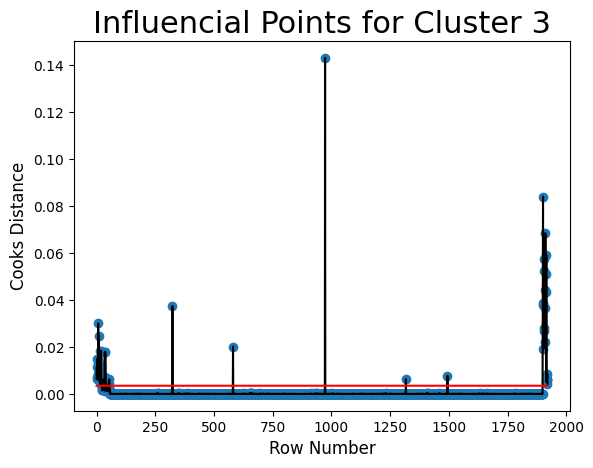

    cook distance                                        discription
0        0.006278  My Mortgage Company - Freedom Mortgage has rep...
1        0.011545  Good evening, To whom it may concern, I paid X...
2        0.007299  XXXX XXXX and Experian refuse to recognize tha...
3        0.015075  In 2019, I initiated a cash-out refinance on m...
4        0.014883  My home mortgage loan was bought out by anothe...
..            ...                                                ...
61       0.005912  I received a prescreened offer from SoFi to re...
62       0.006520  To Whom This May Concern, My tax return was ta...
63       0.005856  I Have been paying my monthly payment as I hav...
64       0.008339  I previously filed a complaint through CFPB, t...
65       0.004268  I requested information about refinancing my c...

[66 rows x 2 columns]


,old_model_score,clustering_model_score,improvement
0,0.949026,0.780305,False
1,0.906488,0.618555,False
2,0.977242,0.914320,False
3,0.968563,0.836204,False
4,0.941248,0.759640,False
5,0.955005,0.783905,False
6,0.929074,0.730990,False
7,0.980981,0.957190,False


In [ ]:
import statsmodels.api as sm
results = []

for n_cluster in clustering_x.keys():
  new_X= np.array(clustering_x[n_cluster])

  new_y = np.array(clustering_y[n_cluster]).reshape(-1,1)

  #cook distance
  #add constant to predictor variables
  x = sm.add_constant(new_X)

  #fit linear regression model
  model = sm.OLS(new_y, x).fit()
  np.set_printoptions(suppress=True)

  #create instance of influence
  influence = model.get_influence()

  #obtain Cook's distance for each observation
  cooks = influence.cooks_distance
  mean_cooks = np.mean(cooks[0])
  mean_cooks_list = [5*mean_cooks for i in range(len(cooks[0]))]
  # Draw plot
  x_axis = list(range(len(cooks[0])))
  fig, graph = plt.subplots()
  #plt.figure(figsize = (12, 8))
  graph.scatter(x_axis, cooks[0])
  graph.plot(x_axis, cooks[0], color='black')
  graph.plot(x_axis, mean_cooks_list, color="red")
  plt.xlabel('Row Number', fontsize = 12)
  plt.ylabel('Cooks Distance', fontsize = 12)
  plt.title('Influencial Points for Cluster {}'.format(n_cluster), fontsize = 22)

  cooks_samples = []
  for i, txt in enumerate(clustering_samples[n_cluster]):
    if cooks[0][i]>4*mean_cooks:
      # graph.annotate(txt, (x_axis[i], cooks[0][i]))
      cooks_samples.append([cooks[0][i],txt])

  plt.show()

  train_x,test_x,train_y,test_y = train_test_split(new_X, new_y, test_size=0.2, random_state=42)
  # print(train_x.shape)
  # print(train_y.shape)
  clf = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 42).fit(train_x,train_y)
  y_train = clf.predict(train_x)
  target_names = ['Checking or savings account', 'Credit card or prepaid card','Credit reporting, credit repair services, or other personal consumer reports','Debt collection','Mortgage','Student loan']
  # print('training report for cluster {}'.format(n_cluster))
  # print(classification_report(train_y, y_train, target_names=target_names))

  y_pred = clf.predict(test_x)
  test_score = f1_score(test_y, clf.predict(test_x),average='weighted')
  test_score_original = f1_score(test_y, original_clf.predict(test_x),average='weighted')
  results.append([test_score_original,test_score,test_score>test_score_original])
  # print('testing report for cluster {}'.format(n_cluster))
  # print(classification_report(test_y, y_pred, target_names=target_names))
  print(pd.DataFrame(cooks_samples,columns=['cook distance','discription']))
results = pd.DataFrame(results,columns=['old_model_score','clustering_model_score','improvement'])
results

### Keep same sample size

In [ ]:
from collections import defaultdict
clusturing_models = defaultdict(list)
clustering_x = defaultdict(list)
clustering_y = defaultdict(list)
X = np.array(X)
for i in range(len(data)):
  l,u = labels[i],X[i]
  clustering_x[l].append(u)
  clustering_y[l].append(data.label.tolist()[i])

In [ ]:
#original_model downsample
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score
X,y = data.drop(columns=['Consumer complaint narrative','label','Product'],axis=1),data['label']
# umap_embeddings = umap.UMAP(n_neighbors=100,
#                             n_components=20,
#                             metric='cosine').fit_transform(X)
train_x,test_x,train_y,test_y = train_test_split(umap_embeddings, y, test_size=0.2, random_state=42)
original_clf = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 42).fit(train_x,train_y)
y_train = original_clf.predict(train_x)
target_names = ['Checking or savings account', 'Credit card or prepaid card','Credit reporting, credit repair services, or other personal consumer reports','Debt collection','Mortgage','Student loan']
# print('training report for cluster {}'.format(n_cluster))
# print(classification_report(train_y, y_train, target_names=target_names))
target_names = ['Checking or savings account', 'Credit card or prepaid card','Credit reporting, credit repair services, or other personal consumer reports','Debt collection','Mortgage','Student loan']
y_pred = original_clf.predict(test_x)
print('f1 score',f1_score(test_y, original_clf.predict(test_x),average='weighted'))
print(classification_report(test_y, y_pred, target_names=target_names))

f1 score 0.8264976060969298
                                                                              precision    recall  f1-score   support

                                                 Checking or savings account       0.79      0.89      0.84       506
                                                 Credit card or prepaid card       0.79      0.75      0.77       500
Credit reporting, credit repair services, or other personal consumer reports       0.77      0.81      0.79       502
                                                             Debt collection       0.81      0.74      0.77       535
                                                                    Mortgage       0.91      0.89      0.90       470
                                                                Student loan       0.90      0.90      0.90       487

                                                                    accuracy                           0.83      3000
                          

In [ ]:
results = []

for n_cluster in clustering_x.keys():
  new_X= np.array(clustering_x[n_cluster])

  new_y = np.array(clustering_y[n_cluster]).reshape(-1,1)

  train_x,test_x,train_y,test_y = train_test_split(new_X, new_y, test_size=0.2, random_state=42)
  clf = LogisticRegression(random_state=0,max_iter=500).fit(train_x,train_y)
  y_train = clf.predict(train_x)
  target_names = ['negative', 'positive']
  # print('training report for cluster {}'.format(n_cluster))
  # print(classification_report(train_y, y_train, target_names=target_names))

  y_pred = clf.predict(test_x)
  test_score = roc_auc_score(test_y, clf.predict_proba(test_x)[:, 1])
  test_score_original = roc_auc_score(test_y, original_clf.predict_proba(test_x)[:, 1])
  results.append([test_score_original,test_score,test_score>test_score_original])
  # print('testing report for cluster {}'.format(n_cluster))
  # print(classification_report(test_y, y_pred, target_names=target_names))
results = pd.DataFrame(results,columns=['old_model_score','clustering_model_score','improvement'])
results

ValueError: ignored